<a href="https://colab.research.google.com/github/jerrymart/Machine-Learning-Projects/blob/main/Prroject_4_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Team Members:

##### Joseph Mart (Project Lead)- A00732897
##### Callitus Obunadike - A00756855

### Problem Statement

In this project, we consider the spam email detection problem. The data set is available from
several places. One convenient way to access it is through R package kernlab. The objective
is to apply the Random Forest predictive model in determining whether an email is a regular
or spam email.

Thus this is a classication problem with binary responses. Please follow the specic steps
listed below to conduct the analysis:

### Load Libraries

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

### (a)Load the data

In [3]:
df = pd.read_csv('/content/Spamdataset.csv') 

In [ ]:
#Check top 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


###### (b)Take a look at the dimension of the data. Inspect if there are missing values and, if so, impute them.

In [ ]:
#dimension of data

df.shape

(303, 14)

In [ ]:
# Checking for missing values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [ ]:
# Visualize the NULL observations

df[df['ca'].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


thal and ca have missing values since both are categorical it is better to replace the NAs by fillforward or fillbackward
since replacing NAs for them with mean might give a decimal values

In [ ]:
print(df['ca'], end='\n\n')

print(df['thal'])

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    0.0
299    2.0
300    1.0
301    1.0
302    NaN
Name: ca, Length: 303, dtype: float64

0      6.0
1      3.0
2      7.0
3      3.0
4      3.0
      ... 
298    7.0
299    7.0
300    7.0
301    3.0
302    3.0
Name: thal, Length: 303, dtype: float64


In [ ]:
#Fill NA

df.fillna(method='ffill', axis=0, inplace=True)

In [ ]:
#Check again for NAs
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

###### (c) Explore data using numerical and graphical EDA techniques. For example, what is the percentage of spam emails?  What are types (categorical or continuous) of the inputs?  Are there any peculiar features for any variable that we should pay attention to? Don't present any R output for this part unless really necessary.  Instead, summarize your findings in concise language.

In [ ]:
# Investigate all the elements whithin each Feature 

for column in df:
    unique_vals = np.unique(df[column])
    num_of_values = len(unique_vals)
    if num_of_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, num_of_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, num_of_values))

The number of values for feature age :41
The number of values for feature sex :2 -- [0 1]
The number of values for feature cp :4 -- [1 2 3 4]
The number of values for feature trestbps :50
The number of values for feature chol :152
The number of values for feature fbs :2 -- [0 1]
The number of values for feature restecg :3 -- [0 1 2]
The number of values for feature thalach :91
The number of values for feature exang :2 -- [0 1]
The number of values for feature oldpeak :40
The number of values for feature slope :3 -- [1 2 3]
The number of values for feature ca :5 -- [ 0.  1.  2.  3. nan]
The number of values for feature thal :4 -- [ 3.  6.  7. nan]
The number of values for feature num :5 -- [0 1 2 3 4]


What are types (categorical or continuous) of the inputs?

The following features are categorical: sex, cp, fbs, restecg, exang, ca, thal, num while the other features are continuos

###### Are there any peculiar features for any variable that we should pay attention to?

<AxesSubplot:xlabel='exang', ylabel='count'>

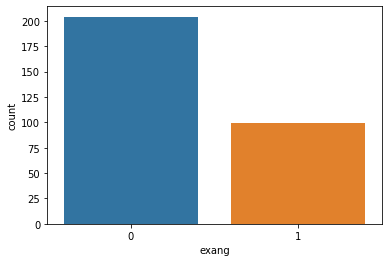

In [ ]:
#Response Balancesness :  frequency distribution

sns.countplot(data=df,x='exang')

The response is not balanced, hence we should expect most of our correct predictions to be True Positive than True Negative for the no spam category

#### Explore the associations between Class and other attributes.

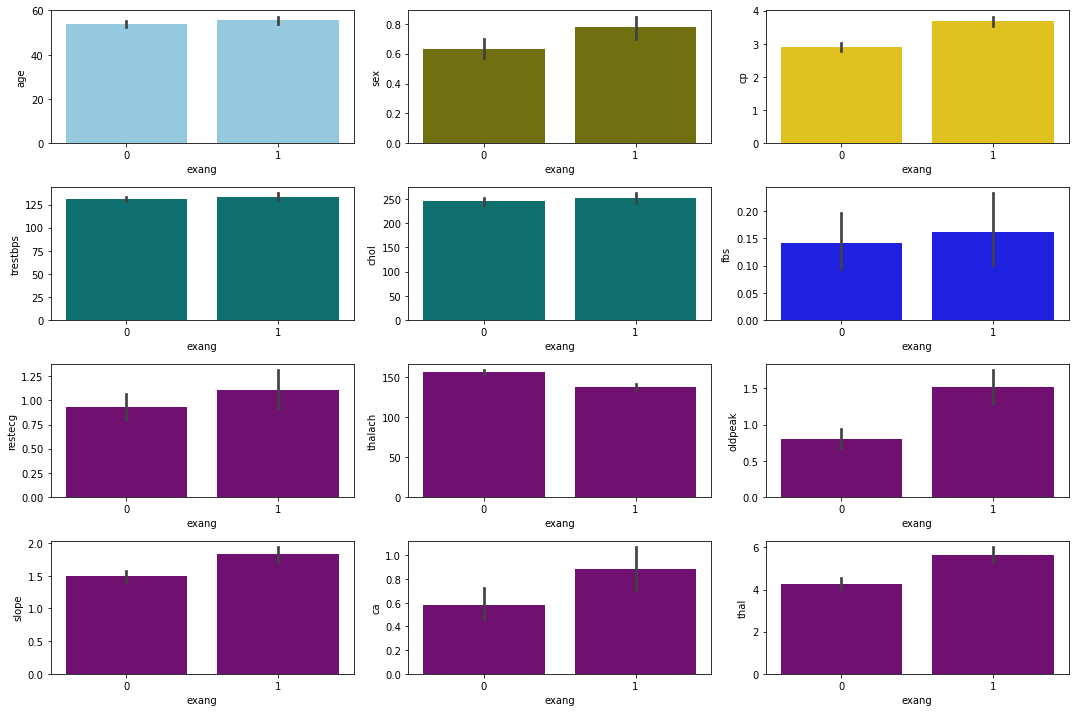

In [ ]:
fig,axs = plt.subplots(4,3, figsize = (15,10))

sns.barplot(data=df,x ='exang' ,y="age",  color="skyblue", ax=axs[0, 0])
sns.barplot(data=df, x ='exang', y="sex", color="olive", ax=axs[0, 1])
sns.barplot(data=df, x ='exang', y="cp", color="gold", ax=axs[0, 2])
sns.barplot(data=df, x ='exang', y="trestbps",color="teal", ax=axs[1, 0])
sns.barplot(data=df, x ='exang', y="chol",color="teal", ax=axs[1, 1])
sns.barplot(data=df, x ='exang', y="fbs", color="blue", ax=axs[1, 2])
sns.barplot(data=df, x ='exang', y="restecg", color="purple", ax=axs[2,0])
sns.barplot(data=df, x ='exang', y="thalach", color="purple", ax=axs[2,1])
sns.barplot(data=df, x ='exang', y="oldpeak", color="purple", ax=axs[2,2])
sns.barplot(data=df, x ='exang', y="slope", color="purple", ax=axs[3,0])
sns.barplot(data=df, x ='exang', y="ca", color="purple", ax=axs[3,1])
sns.barplot(data=df, x ='exang', y="thal", color="purple", ax=axs[3,2])

fig.tight_layout()

##### Investigating Multicolinearity

In [ ]:
#Remove Target Variable

dfcor = df.drop(columns=['exang'])

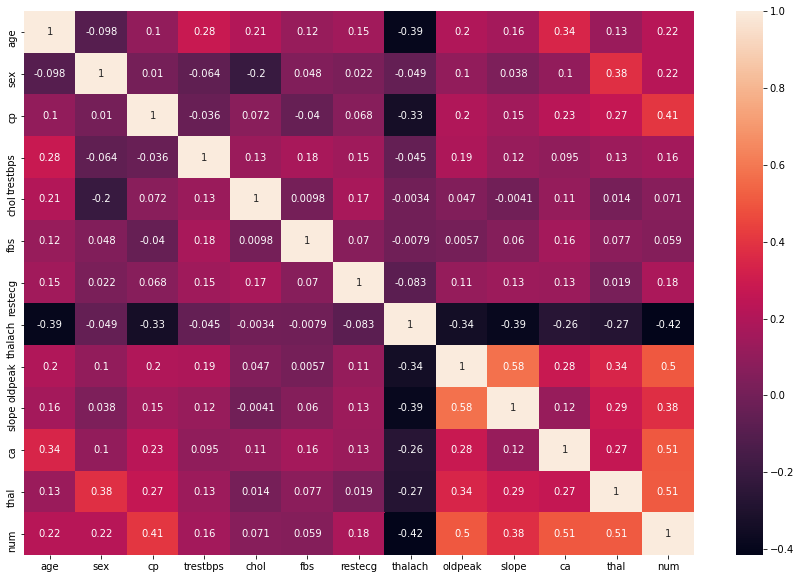

In [ ]:
#Correlation matrix
plt.figure(figsize=(15,10)) #Set figure size

sns.heatmap(dfcor.corr(), annot=True)

plt.show()

In [ ]:
correlatedColumns = []
corr = dfcor.corr()
indices = corr.index
columns = corr.columns
posthreshold = 0.8
negthreshold = -0.8

for c in columns:
    for r in indices:
        if c != r and (corr[c][r] > posthreshold or corr[c][r] < negthreshold):
            correlatedColumns.append({"column" : c , "row" : r , "val" :corr[c][r] })
            
if len(correlatedColumns) < 1: print('No Multicolinearity found in dataset')

else: print(correlatedColumns)

No Multicolinearity found in dataset


There is no Multicolinearity  in the data

##### Are there any peculiar features for any variable that we should pay attention to?

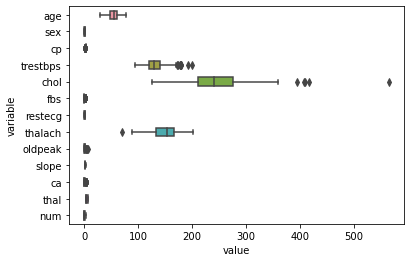

In [ ]:
#Checking Predictors for outliers

#plt.figure(figsize=(25,15))

df2 = pd.DataFrame(data=df, columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                                   'oldpeak', 'slope', 'ca', 'thal', 'num'])

sns.boxplot(y="variable", x="value", data=pd.melt(df2), width= 0.5)
plt.show()

chol and tresbps have outliers

###### what is the percentage of spam emails?

In [ ]:
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

About 1/3 of the emails are spam emails

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

(d) Randomly divide your data sets into the training sample and test sample with a ratio of 2:1.

In [ ]:
# Scaling no categorical columns
#sex, cp, fbs, restecg, exang, ca, thal, num
scale_vars = ['age','trestbps','chol','thalach','oldpeak','slope']
scaler = MinMaxScaler()
df[scale_vars] = scaler.fit_transform(df[scale_vars]) #df[scale_vars] -> making the np.aaary new_raw_data a dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1,1,0.481132,0.244292,1,2,0.603053,0,0.370968,1.0,0.0,6.0,0
1,0.791667,1,4,0.622642,0.365297,0,2,0.282443,1,0.241935,0.5,3.0,3.0,2
2,0.791667,1,4,0.245283,0.235160,0,2,0.442748,1,0.419355,0.5,2.0,7.0,1
3,0.166667,1,3,0.339623,0.283105,0,0,0.885496,0,0.564516,1.0,0.0,3.0,0
4,0.250000,0,2,0.339623,0.178082,0,2,0.770992,0,0.225806,0.0,0.0,3.0,0


In [ ]:
X = df.drop('exang', axis = 1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,num
0,0.708333,1,1,0.481132,0.244292,1,2,0.603053,0.370968,1.0,0.0,6.0,0
1,0.791667,1,4,0.622642,0.365297,0,2,0.282443,0.241935,0.5,3.0,3.0,2
2,0.791667,1,4,0.245283,0.235160,0,2,0.442748,0.419355,0.5,2.0,7.0,1
3,0.166667,1,3,0.339623,0.283105,0,0,0.885496,0.564516,1.0,0.0,3.0,0
4,0.250000,0,2,0.339623,0.178082,0,2,0.770992,0.225806,0.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.333333,1,1,0.150943,0.315068,0,0,0.465649,0.193548,0.5,0.0,7.0,1
299,0.812500,1,4,0.471698,0.152968,1,0,0.534351,0.548387,0.5,2.0,7.0,2
300,0.583333,1,4,0.339623,0.011416,0,0,0.335878,0.193548,0.5,1.0,7.0,3
301,0.583333,0,2,0.339623,0.251142,0,2,0.786260,0.000000,0.5,1.0,3.0,1


In [ ]:
y = df['exang']
y

0      0
1      1
2      1
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: exang, Length: 303, dtype: int64

In [ ]:
#Split the data into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size = 30, random_state=15)

### 2. Supervised Learning:
    
###### (a) Try out the Random Forest (RF) model using the dataset. Use the training set to identify the best model and apply the model to the test set. Since the method involves numerous parameters to choose or tune, make sure that important details in the model fitting are clearly explained in your report.

In [ ]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X_test)

In [ ]:
# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test), end='\n\n\n')

Training Accuracy is:  1.0
Testing Accuracy is:  0.5333333333333333




In [ ]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<Figure size 432x288 with 0 Axes>

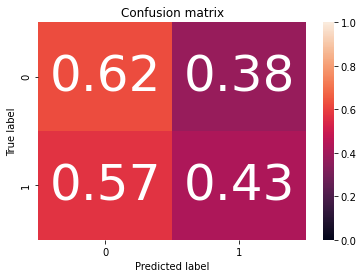

<Figure size 432x288 with 0 Axes>

In [ ]:
# Confusion Matrix output
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plot_confusion_matrix(cm_norm, classes=rf.classes_)
plt.figure()

##### ROC Curve

In [ ]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

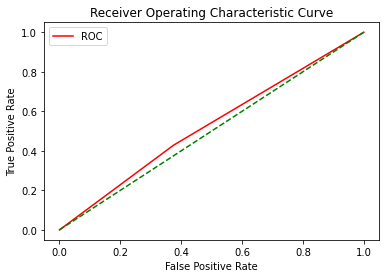

In [ ]:

from sklearn.metrics import roc_curve

fper, tper, thresholds = roc_curve(y_test, prediction_test)
plot_roc_curve(fper, tper)

### 3. Additional Features from RF:

###### (a) Train the RF model with B = 2,000 trees using the entire data set. Make sure that you set these two options: importance = TRUE and proximity = TRUE.

In [ ]:
#Build the model with B=2000
clf = RandomForestClassifier(n_estimators=2000,max_depth=45,max_features="auto", min_samples_leaf=4,
                       min_samples_split=15,bootstrap=False
                    )

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=45, min_samples_leaf=4,
                       min_samples_split=15, n_estimators=2000)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print (f'Train Accuracy - : {clf.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {clf.score(X_test,y_test):.3f}')

Train Accuracy - : 0.896
Test Accuracy - : 0.600


In [ ]:
confusion_matrix(y_test, y_pred)

array([[11,  5],
       [ 7,  7]], dtype=int64)

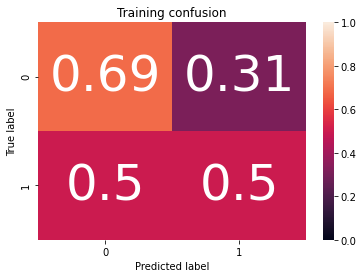

In [ ]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]   # normalize the cm


plt.figure()
plot_confusion_matrix(cm = cm_norm, classes=clf.classes_, title='Training confusion')

We improved on the TN, TP compared to the firt RF we had 

A better way to approach this is to do Hyperparameter Tuning and build a final best RF model for the best parameters

###### i. Obtain the variable importance ranking plots.

We will use Random Forest feature importnace inbuilt method to get Feature Importnace

In [ ]:
#Feature Importance
df_var_importance = pd.DataFrame({'Variable': X,
                           'Importance': clf.feature_importances_}) \
                .sort_values(by='Importance', ascending=False) \
                .reset_index(drop=True)

In [ ]:
df_var_importance

,Variable,Importance
0,"(t, h, a, l, a, c, h)",0.229632
1,"(n, u, m)",0.226569
2,"(c, p)",0.149501
3,"(o, l, d, p, e, a, k)",0.090581
4,"(t, r, e, s, t, b, p, s)",0.071623
5,"(t, h, a, l)",0.063043
6,"(c, h, o, l)",0.046244
7,"(a, g, e)",0.038673
8,"(s, l, o, p, e)",0.024043
9,"(c, a)",0.019135


In [ ]:
#(df_var_imp['Importance'])

<AxesSubplot:ylabel='Variable'>

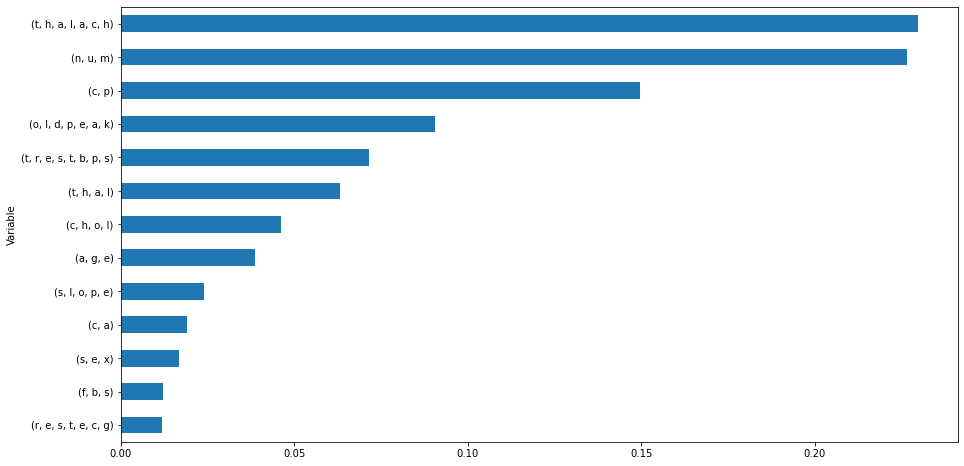

In [ ]:
#variable importance ranking plots

df_var_importance[:len(X)].sort_values('Importance').plot('Variable','Importance', 'barh', figsize=(15,8), legend=False)

#### ii. Obtain the partial dependence plot for the top two variables that you deem most important. Interpret your analysis.

variables ; thalach and num  are the top variables on the basis of variable importance. Let us see how they relate to the dependent variable.

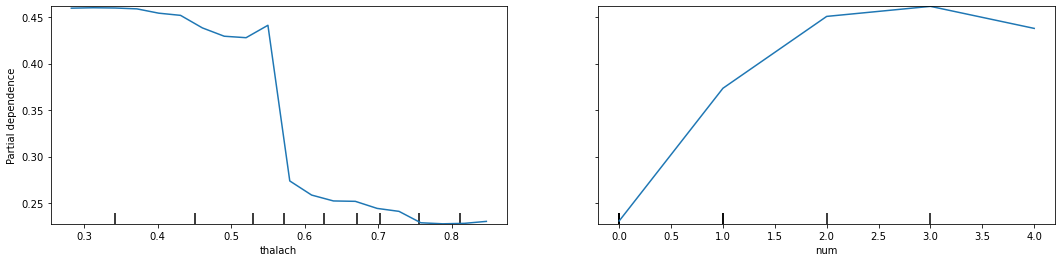

In [ ]:
#partial dependence plot for the top two variables

fig,ax = plt.subplots(figsize=(18, 4))
plot_partial_dependence(clf, X, ['thalach','num'], grid_resolution=20, ax=ax);

For thalach, event rate is higher for lower values of the variable. Also, seems like there can be a cut-off value which can be used

For num, event rate goes linearly bigger as values grows higher.   for classification.

Let us also see the distribution of data as histogram for the two variables.

<AxesSubplot:xlabel='num', ylabel='Count'>

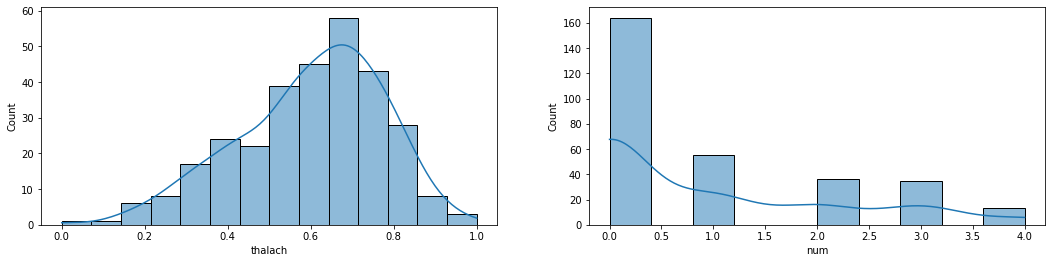

In [ ]:
#Histogram Plot

fig,ax = plt.subplots(1, 2, figsize=(18, 4))
sns.histplot(data= X, x=X['thalach'], ax=ax[0], kde=True )
sns.histplot(data= X, x=X['num'], ax=ax[1],kde=True )

thalach is left-skewed

num is righ-skewed

#### iii. Obtain the proximity matrix and transform it into a distance or dissimilarity matrix.

In [ ]:
def proximityMatrix(model, X, normalize=True):      

    terminals = clf.apply(X)
    nTrees = terminals.shape[1]

    a = terminals[:,0]
    proxMat = 1*np.equal.outer(a, a)

    for i in range(1, nTrees):
        a = terminals[:,i]
        proxMat += 1*np.equal.outer(a, a)

    if normalize:
        proxMat = proxMat / nTrees

    return proxMat

In [ ]:
#Print Proximity Matrix

proximityMatrix(clf, X_train, normalize=True)

array([[1.    , 0.    , 0.364 , ..., 0.015 , 0.    , 0.0025],
       [0.    , 1.    , 0.    , ..., 0.053 , 0.146 , 0.116 ],
       [0.364 , 0.    , 1.    , ..., 0.0125, 0.    , 0.002 ],
       ...,
       [0.015 , 0.053 , 0.0125, ..., 1.    , 0.0035, 0.027 ],
       [0.    , 0.146 , 0.    , ..., 0.0035, 1.    , 0.038 ],
       [0.0025, 0.116 , 0.002 , ..., 0.027 , 0.038 , 1.    ]])

In [ ]:
len(proximityMatrix(clf, X_train, normalize=True))

212

In [ ]:
#dissimilarity matrix
from scipy.spatial import distance_matrix

distance_matrix([[0,0],[0,1]], [[1,0],[1,1]])

array([[1.        , 1.41421356],
       [1.41421356, 1.        ]])